In [152]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

### Ejercicio 3

Voy a tomar $y''(t_i)=\frac{y_{i+1}-2y_{i}+y_{i-1}}{h^2}$, $y'(t_i)=\frac{y_{i+1}-y_{i-1}}{2h}$

Entonces tengo: $\frac{y_{i+1}-2y_{i}+y_{i-1}}{h^2}+\frac{y_{i+1}-y_{i-1}}{2h}+y_i$

Y por lo tanto me queda: $y_{i+1}(\frac{1}{h^2}+\frac{1}{2h}) + y_i(1-\frac{2}{h^2}) + y_{i-1}(\frac{1}{h^2}-\frac{1}{2h})$

Voy a usar el metodo de diferencias finitas basado en la resolución de un sistema de ecuaciones lineales, me armo la matriz teniendo en cuenta los coeficientes que acompañan a cada $y_{i+1}$, $y_{i}$ y $y_{i-1}$ 

In [153]:
def f(t, w):
  return np.sin(np.pi*w*t)

In [154]:
def DifFinitas(a,b,h,f,w):

  N = int((b-a)/h)
  t = np.linspace(a,b,N+1)
  u = np.zeros(N-1)
  b = np.zeros(N-1)
  
  NdiagArriba = (1/(h**2))+(1/(2*h))
  Ndiag = 1-(2/(h**2))
  NdiagAbajo = (1/(h**2))-(1/(2*h))

  for i in range(0,N-1):
     b[i] = f(t[i], w)

  b[0] = b[0]-0*NdiagAbajo
  b[N-2] = b[N-2]-1*NdiagArriba

  Diag = np.ones(N-1)*Ndiag
  DiagArriba = np.ones(N-2)*NdiagArriba
  DiagAbajo = np.ones(N-2)*NdiagAbajo


  A = np.diag(Diag)+np.diag(DiagArriba,1)+np.diag(DiagAbajo,-1)

  u = np.linalg.solve(A,b)
  
  u = np.concat(([0],u,[1]))

  return t,u,A,b

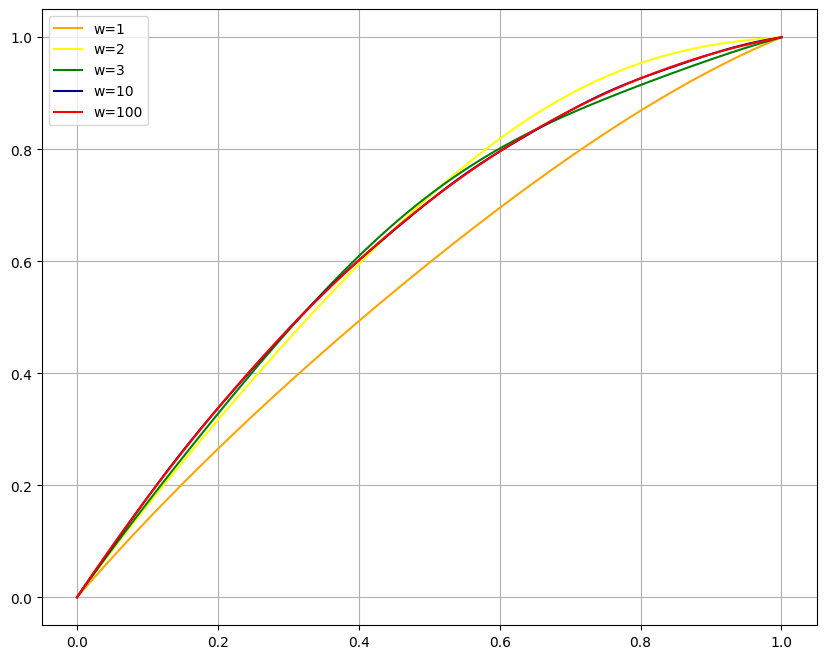

In [202]:
plt.figure(figsize=(10,8))

for (w,c) in [(1, 'orange'), (2, 'yellow'), (3, 'green'), (10, 'navy'), (100, 'red')]:
    t, u, A, b = DifFinitas(0,1,0.001,f,w)
    plt.plot(t,u,color=c)

plt.legend(['w=1','w=2','w=3','w=10','w=100'])
plt.grid()
plt.show()

No pongo el grafico de $w=1000$ porque practicamente tapa a $w=10$

In [198]:
t, u1, A, b = DifFinitas(0,1,0.001,f,10)
t, u2, A, b = DifFinitas(0,1,0.001,f,100)

Me preocupaba que coincidan los graficos, pero para eso chequeo si estan demasiado cerca los vectores 

In [199]:
sum(np.isclose(u1,u2))

np.int64(11)

Coinciden bastante en 11 lugares de 1001 (parece que se pegan al principio y al final). Para mi los graficos coinciden porque no me cambia demasiado al sistema el w a medida que alcanza cierto valor, que la derivada sea el seno solo me comanda la forma del grafico, dandole un poquito de curva.

Algo gracioso es que si hubiera una solucion limite cuando w tiende a infinito, que fuera a lo que se va pareciendo a medida que lo agrando, pareceria que las soluciones para cada w cortan a esa solución limite w-1 veces (sin tener en cuenta $t=0$ y $t=1$), de manera equiespaciada. Veamos para $w=1,2,3,4$ en naranja, contra $w=10000$ en rojo

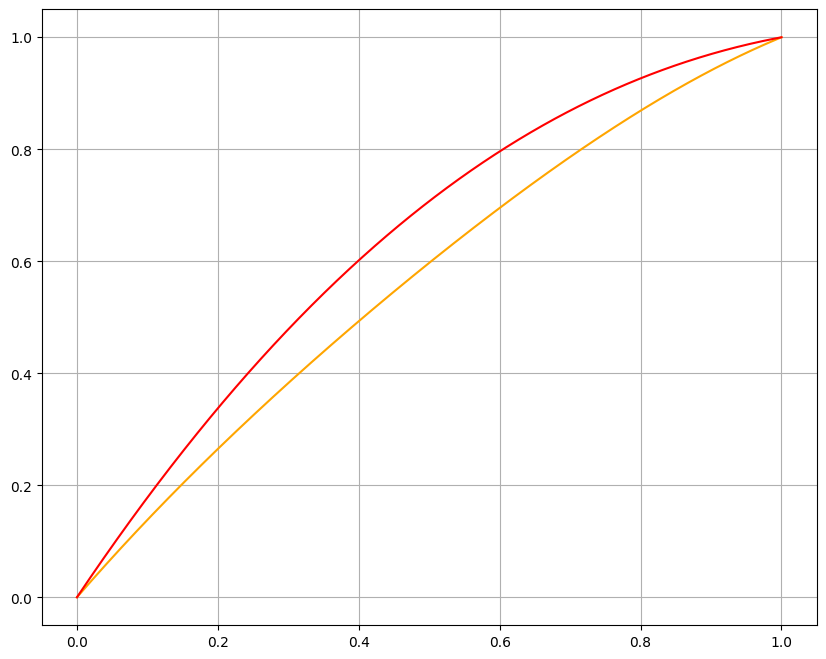

In [203]:
plt.figure(figsize=(10,8))

for (w,c) in [(1, 'orange'), (10000, 'red')]:
    t, u, A, b = DifFinitas(0,1,0.001,f,w)
    plt.plot(t,u,color=c)
    
plt.grid()
plt.show()

Lo corta 0 veces

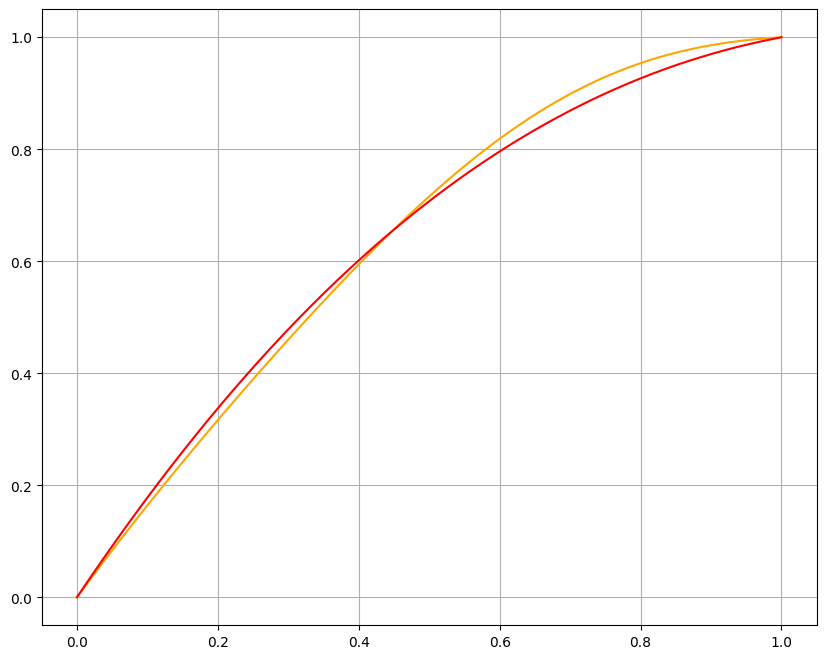

In [204]:
plt.figure(figsize=(10,8))

for (w,c) in [(2, 'orange'), (10000, 'red')]:
    t, u, A, b = DifFinitas(0,1,0.001,f,w)
    plt.plot(t,u,color=c)
    
plt.grid()
plt.show()

Lo corta 1 vez

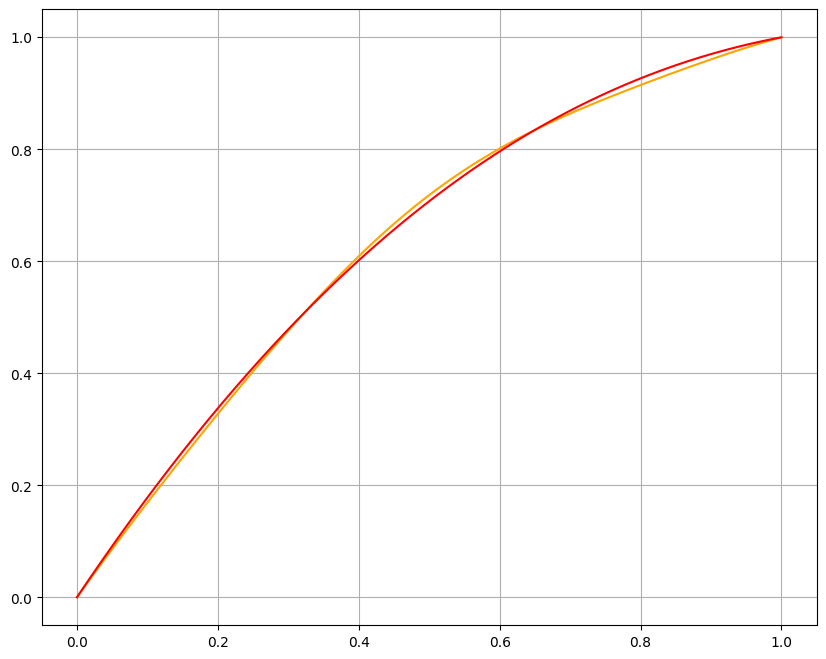

In [205]:
plt.figure(figsize=(10,8))

for (w,c) in [(3, 'orange'), (10000, 'red')]:
    t, u, A, b = DifFinitas(0,1,0.001,f,w)
    plt.plot(t,u,color=c)
    
plt.grid()
plt.show()

Lo corta 2 veces

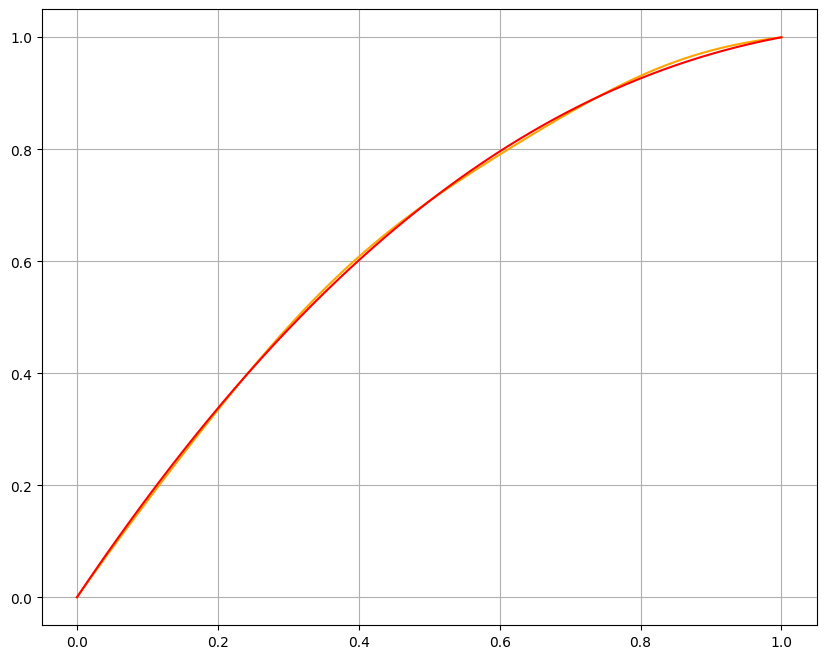

In [206]:
plt.figure(figsize=(10,8))

for (w,c) in [(4, 'orange'), (10000, 'red')]:
    t, u, A, b = DifFinitas(0,1,0.001,f,w)
    plt.plot(t,u,color=c)
    
plt.grid()
plt.show()

Lo corta 3 veces, etc...

### Ejercicio 6

Voy a usar el metodo explicito para resolver la ecuacion numericamente. 

Estoy tomando $U_{xx}(x_i,t_j) = \frac{U_{i+1}^j-2U_{i}^j+U_{i-1}^j}{dx^2}$ y $U_{tt}(x_i,t_j) = \frac{U_{i}^{j+1}-2U_{i}^j+U_{i}^{j-1}}{dt^2}$

In [168]:
def ondas_explicito(T, a, b, m, n, c, g):
    dx = (b-a)/(m-1)
    dt = T/(n-1)
    r = (dt/dx)**2
    
    x = np.linspace(a,b,m)
    t = np.linspace(0,T,n)
    
    U = np.zeros((m,n))
    U[:, 0] = [g(i) for i in x] # u(x,0) = g(x)
    U[:, 1] = U[:, 0] # ut(x,0) = 0
    U[0, :] = 0 # u(0,t) = 0
    U[-1, :] = 0 # u(3,t) = 0 
    
    for k in range(1, n-1):
        for i in range(1, m-1):
            U[i, k+1] = (c**2)*r*U[i-1, k] + (2 - 2*(c**2)*r)*U[i, k] + (c**2)*r*U[i+1, k] - U[i, k-1]
    
    return x, t, U

In [166]:
def g(x):
    return 5*np.sin(4*np.pi*x) - 3*np.sin(8*np.pi*x)

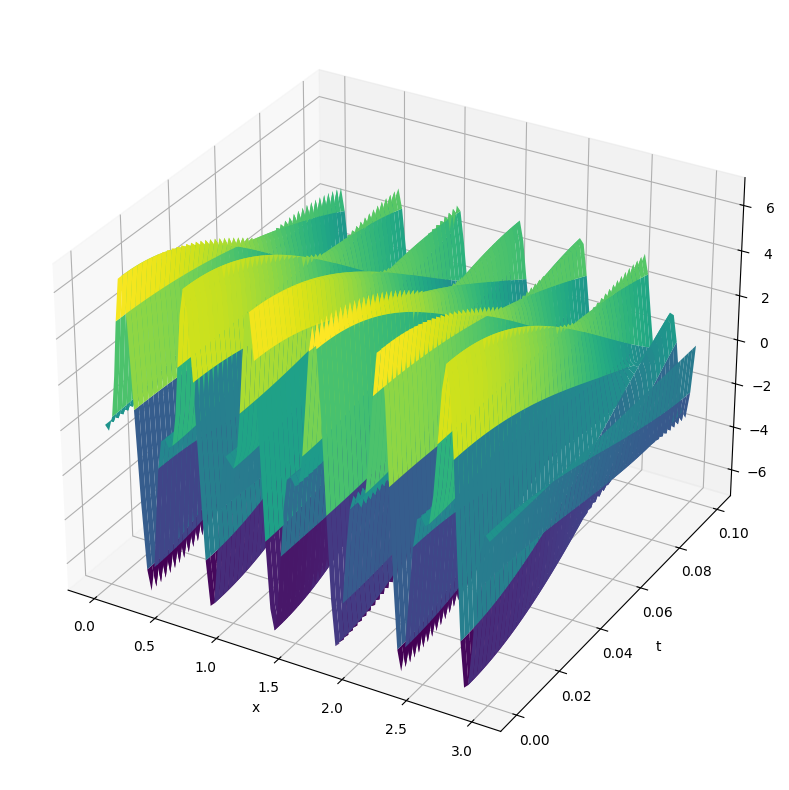

In [167]:
x, t, U = ondas_explicito(0.1, 0, 3, 100, 1000, 1, g)

T, X = np.meshgrid(t, x)

plt.figure(figsize=(15,10))
ax = plt.axes(projection ='3d')
ax.plot_surface(X, T, U, cmap = cm.viridis)
plt.xlabel("x")
plt.ylabel("t")

plt.show()

Le doy poco tiempo para que avance, sino se transforma en algo inentedible, por ejemplo.

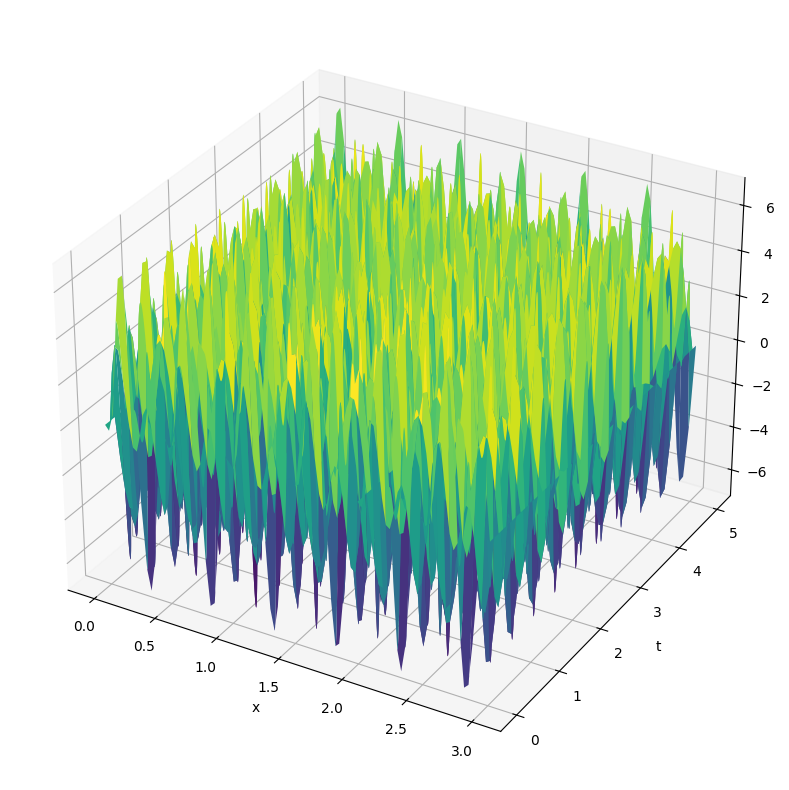

In [164]:
x, t, U = ondas_explicito(5, 0, 3, 100, 1000, 1, g)

T, X = np.meshgrid(t, x)

plt.figure(figsize=(15,10))
ax = plt.axes(projection ='3d')
ax.plot_surface(X, T, U, cmap = cm.viridis)
plt.xlabel("x")
plt.ylabel("t")

plt.show()

Igualmente asi escalado mas en el tiempo puede verse un poco mas que representa claramente algo como las oscilaciones de un fluido es cual fue golpeado de manera brusca.